In [1]:
# import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.simplefilter('ignore')

from auto_learning.models import CLASSIFICATION_MODELS, REGRESSION_MODELS
from auto_learning.hyp_param_search import HypParamSearch

data = load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

SVR(C=32, epsilon=1, gamma=0.0625)


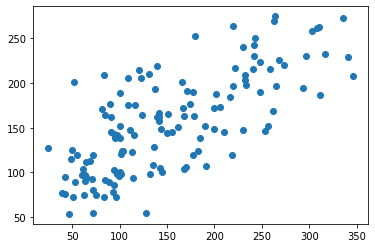

0.4808810648311468 0.5318306188683921


NameError: name 'sns' is not defined

In [17]:
feature_selection = 'None'
crossval_type = 'kfold'
search_type = 'bayes'
metrics = 'r2'
problem_type = 'regression'

est_list = []
for func in REGRESSION_MODELS.values():
    est, params = func()
    hyp = HypParamSearch(x_train,
                         y_train,
                         x_test,
                         y_test,
                         est,
                         problem_type,
                         feature_selection,
                         params,
                         crossval_type,
                         search_type,
                         metrics)
    y_test_list, y_test_predicted_list, val_score, test_score, est = hyp.hyp_param_search()
    est_list.append(est)

    print(est)

    plt.figure()
    plt.scatter(y_test_list, y_test_predicted_list)
    plt.show()

    print(val_score, test_score)

    y_test_predicted_list = np.array(y_test_predicted_list, int)
    cm = confusion_matrix(y_test_list, y_test_predicted_list)

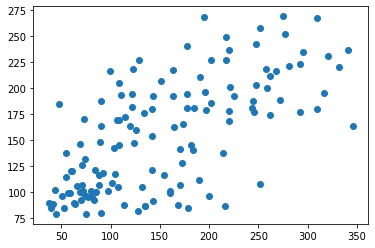

In [5]:
feature_selection = 'None'
crossval_type = 'kfold'
search_type = 'brute'
metrics = 'r2'
problem_type = 'regression'

func = REGRESSION_MODELS['rfr']
est, params = func()
hyp = HypParamSearch(x_train,
                        y_train,
                        x_test,
                        y_test,
                        est,
                        problem_type,
                        feature_selection,
                        params,
                        crossval_type,
                        search_type,
                        metrics)
y_test_list, y_test_predicted_list, val_score, test_score, est = hyp.hyp_param_search()

plt.figure()
plt.scatter(y_test_list, y_test_predicted_list)
plt.show()

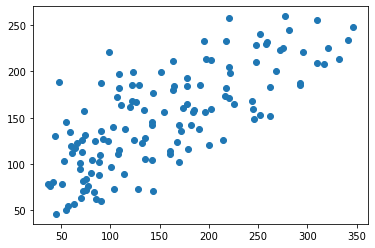

In [6]:
feature_selection = 'None'
crossval_type = 'kfold'
search_type = 'brute'
metrics = 'r2'
problem_type = 'regression'

func = REGRESSION_MODELS['ridge']
est, params = func()
hyp = HypParamSearch(x_train,
                        y_train,
                        x_test,
                        y_test,
                        est,
                        problem_type,
                        feature_selection,
                        params,
                        crossval_type,
                        search_type,
                        metrics)
y_test_list, y_test_predicted_list, val_score, test_score, est = hyp.hyp_param_search()

plt.figure()
plt.scatter(y_test_list, y_test_predicted_list)
plt.show()

In [2]:
REGRESSION_MODELS.keys()

dict_keys(['ridge', 'lasso', 'svr', 'rfr', 'pca_ridge', 'pca_lasso'])